Link to the tutorial : https://fenicsproject.org/pub/tutorial/html/._ftut1006.html#ftut-navier-stokes

In [6]:
"""
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
"""

from fenics import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

In [10]:
# Create mesh and define function space
# Define the mesh
length = 1.0
width = 1.0
nx = ny = 10  # Number of cells in x and y directions
# https://fenicsproject.org/olddocs/dolfin/1.6.0/python/programmers-reference/cpp/mesh/RectangleMesh.html
mesh = RectangleMesh(Point(0, 0), Point(length, width), nx, ny)

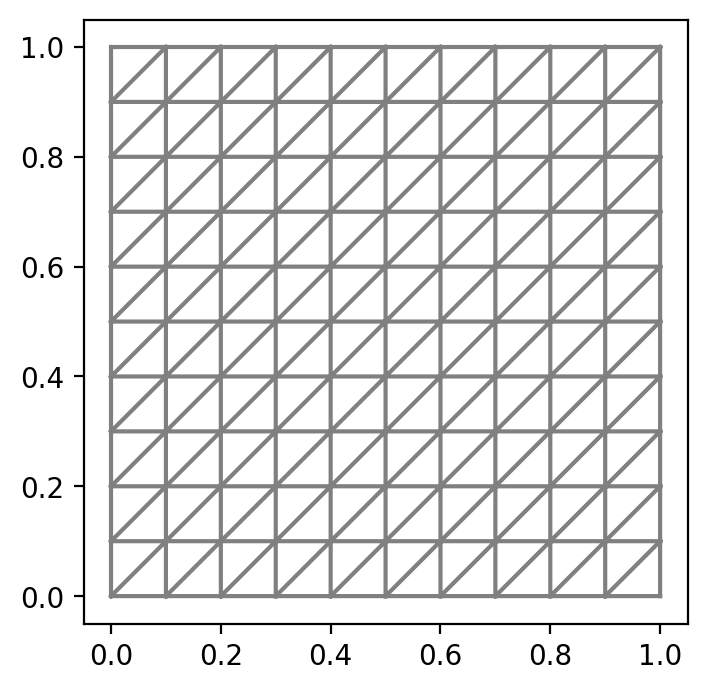

In [15]:
plt.figure(dpi=200)
plot(mesh)

In [17]:
V = FunctionSpace(mesh, 'P', 1) # linear triangles with lagrangian basis functions.

# The true solution
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)

In [18]:
# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary) # stripping the BC from the true solution expression on boundary

# Define initial value
u_n = interpolate(u_D, V)   # default time already set to zero i.e. t=0 in u_D expression (the true solution)

In [19]:
# Define variational problem
u = TrialFunction(V) # shape function
v = TestFunction(V) # weighted residual test function
f = Constant(beta - 2 - 2*alpha) # force terms

# The final weak form
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx

# The lhs and rhs functions separate the bilinear form a and the linear form L from the combined form F.
a, L = lhs(F), rhs(F)

In [29]:
# Time-stepping
temporal_dcitionary = {}
u = Function(V)
t = 0
for n in range(num_steps):
    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    # Plot solution
    # plot(u)
    # save a dictionary of spatial simuatlion for each timestep
    temporal_dcitionary.update({str(t) : u})


    # Compute error at vertices
    u_e = interpolate(u_D, V) # true solution
    error = np.abs(u_e.vector() - u.vector()).max()
    print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)

Solving linear variational problem.
t = 0.20: error = 0.689
t = 0.40: error = 0.15
Solving linear variational problem.
t = 0.60: error = 0.0306Solving linear variational problem.

Solving linear variational problem.
t = 0.80: error = 0.00609
Solving linear variational problem.
t = 1.00: error = 0.00121
t = 1.20: error = 0.00024Solving linear variational problem.

t = 1.40: error = 4.75e-05
t = 1.60: error = 9.41e-06
Solving linear variational problem.
t = 1.80: error = 1.87e-06
t = 2.00: error = 3.7e-07Solving linear variational problem.
Solving linear variational problem.

Solving linear variational problem.


In [31]:
temporal_dcitionary.keys()

dict_keys(['0.2', '0.4', '0.6000000000000001', '0.8', '1.0', '1.2', '1.4', '1.5999999999999999', '1.7999999999999998', '1.9999999999999998'])

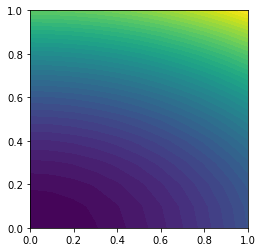

In [68]:
plot(temporal_dcitionary['0.2'])

In [36]:
import matplotlib.animation as animation

frame no.  0
frame no.  0
frame no.  1
frame no.  2
frame no.  3
frame no.  4
frame no.  5
frame no.  6
frame no.  7
frame no.  8
frame no.  9


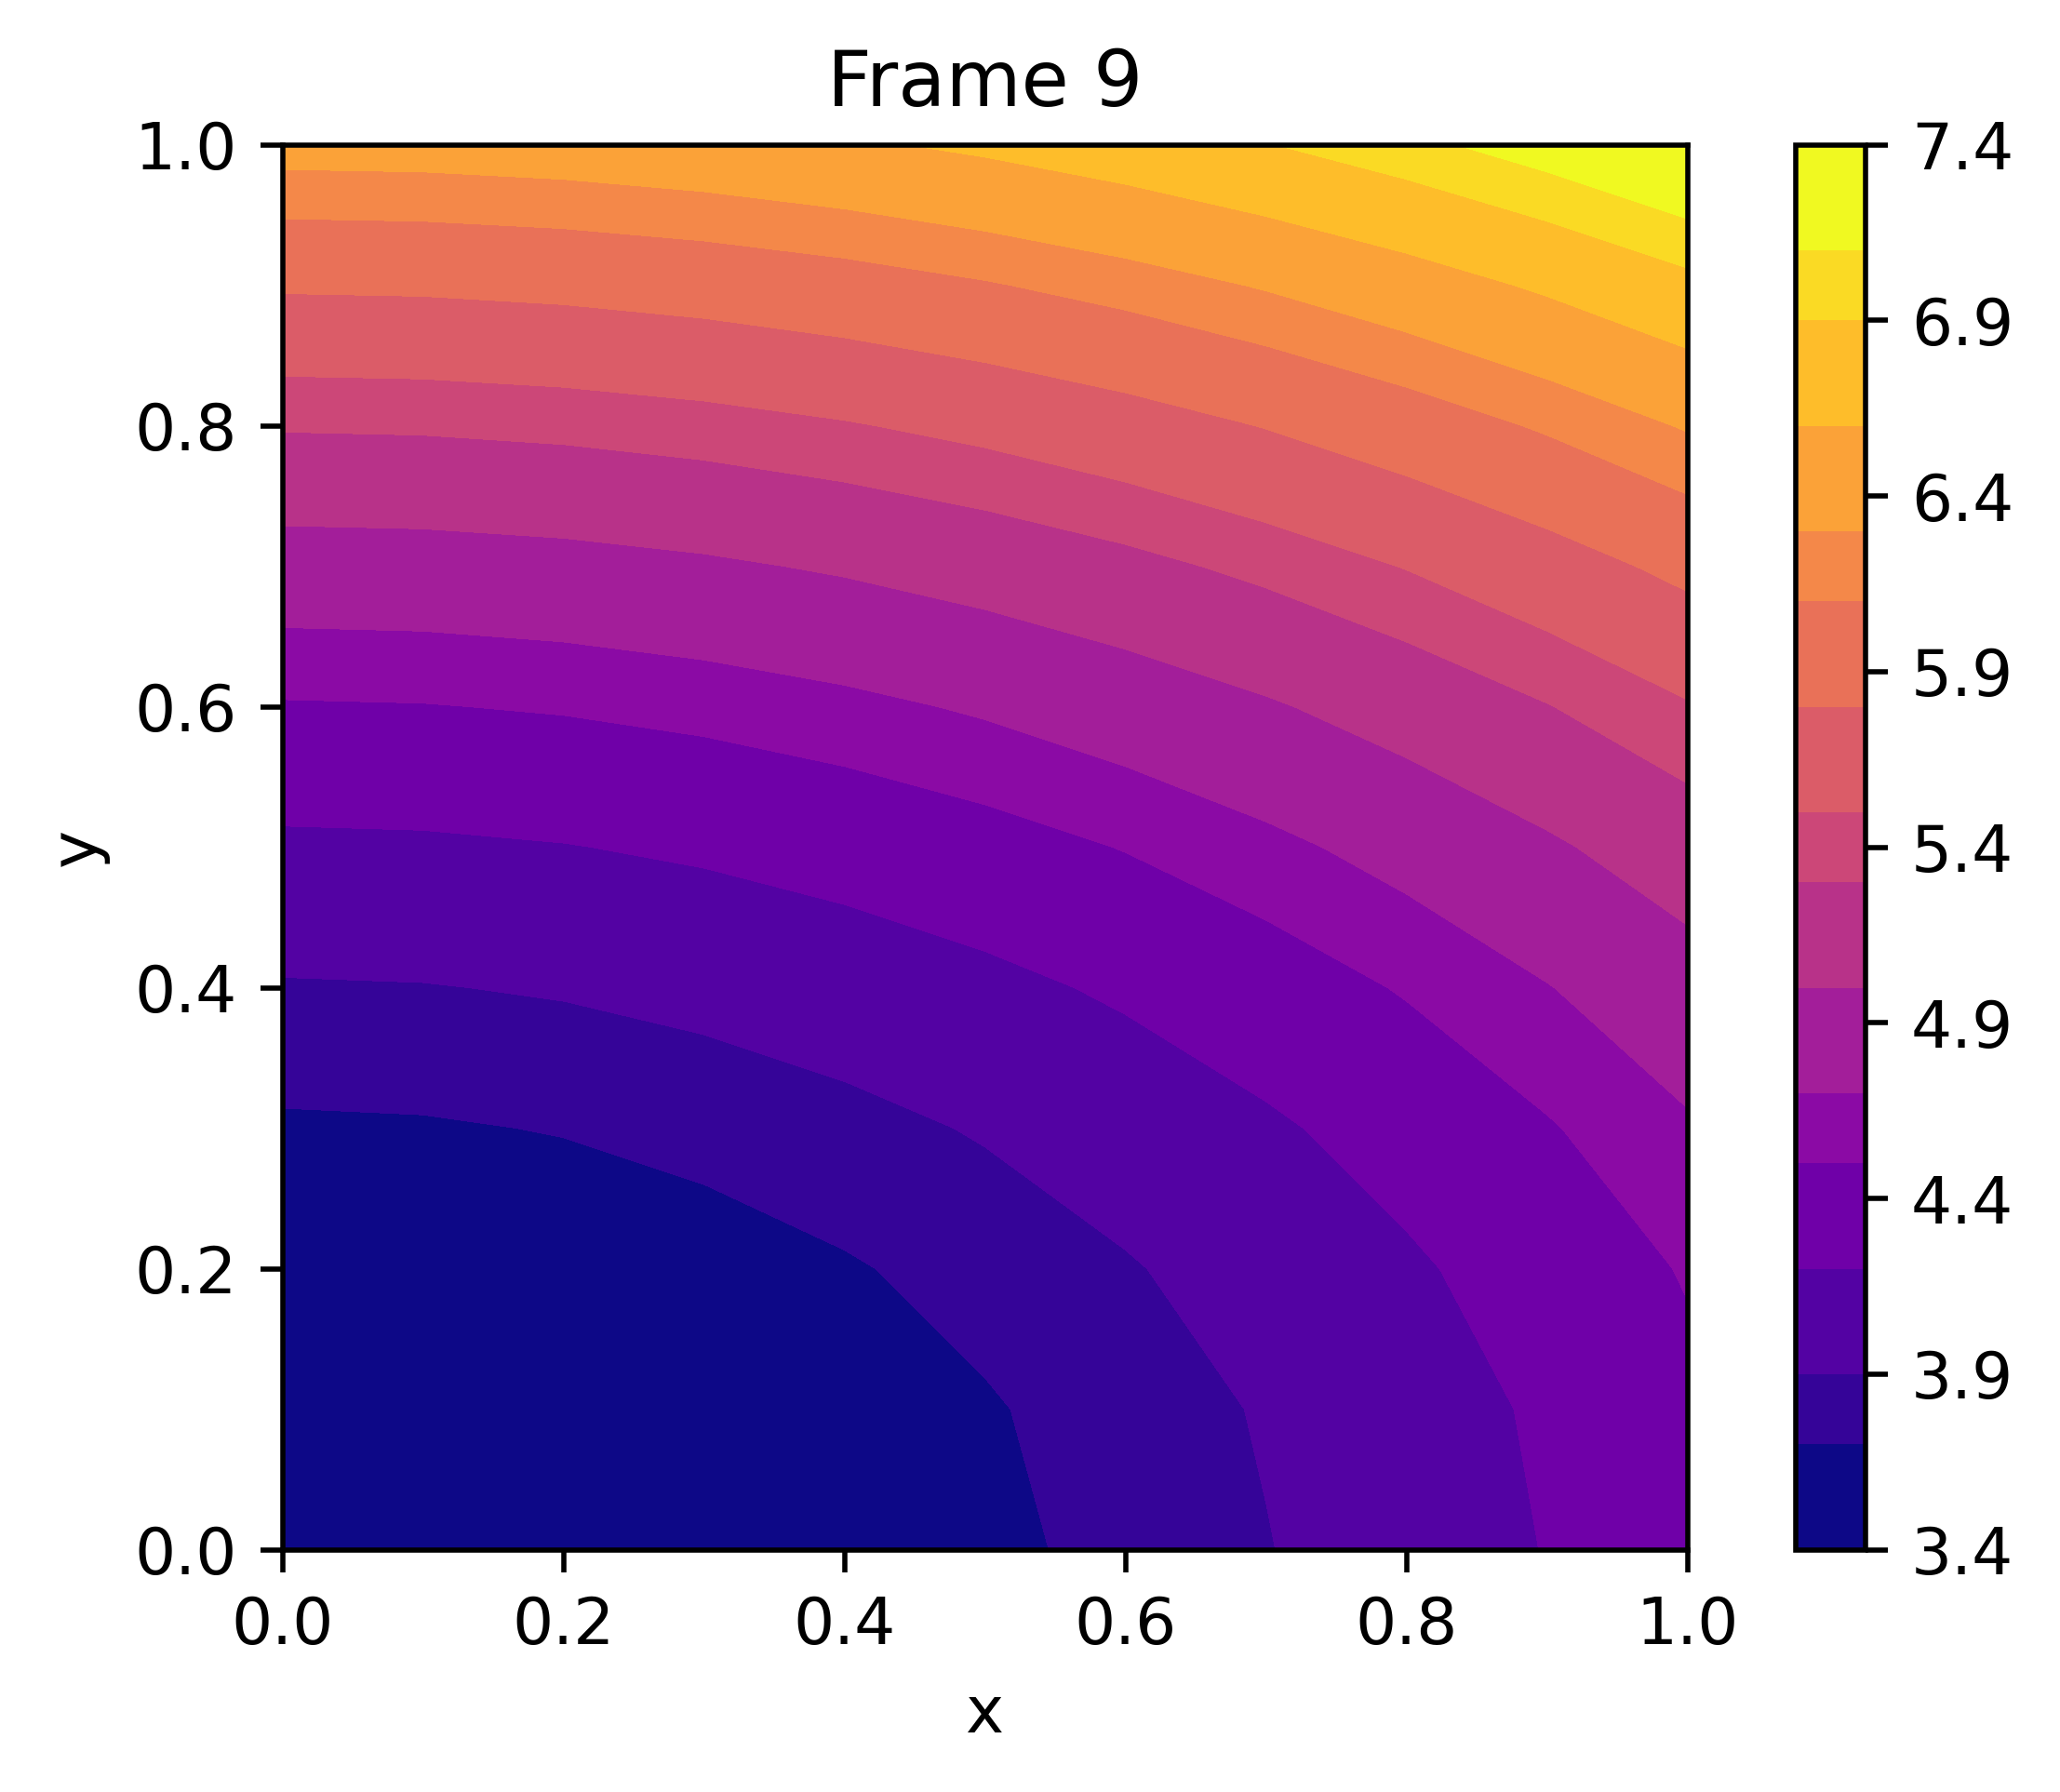

In [73]:
# making a movie
# save the timesteps
keys = list(temporal_dcitionary.keys())

plt.figure(dpi=500)
# Define the function to update the plot
def update_plot(frame):
    print('frame no. ',frame)
    plt.clf() # Clear the previous plot
    sc = plot(temporal_dcitionary[keys[frame]], cmap=plt.get_cmap('plasma', 15)) # Add the new data to the plot
    plt.colorbar(sc) # Add a colorbar
    plt.title(f"Frame {frame}") # Add a title
    #plt.axis('off') # Remove the axis
    plt.xlabel('x')
    plt.ylabel('y')


# Create the animation
ani = animation.FuncAnimation(plt.gcf(), update_plot, frames=len(keys), interval=10)
ani.save('simulation.mp4', writer='ffmpeg', fps=1)
plt.show()


In [51]:
list(keys)

['0.2',
 '0.4',
 '0.6000000000000001',
 '0.8',
 '1.0',
 '1.2',
 '1.4',
 '1.5999999999999999',
 '1.7999999999999998',
 '1.9999999999999998']